<a href="https://colab.research.google.com/github/RavinduP/BankMarket_prediction/blob/main/Machinelearningcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Prepocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
file_path = '/content/bank-full.csv'  # Replace with the path to your dataset
df = pd.read_csv(file_path, sep=';')  # Adjust separator if needed

In [ ]:
# Preview the data
print("First 5 rows:")
print(df.head())


First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Overview of data
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

In [ ]:
# Check for columns with mostly missing or irrelevant data
missing_percent = df.isnull().sum() / len(df) * 100
print("\nMissing Percentage in Columns:")
print(missing_percent[missing_percent > 0])

# Drop columns if required (example below, customize based on findings)
# df.drop(['unnecessary_column'], axis=1, inplace=True)



Missing Percentage in Columns:
Series([], dtype: float64)


In [ ]:
# Identify columns with a single unique value
unique_counts = df.nunique()
print("\nFeatures with One Unique Value:")
print(unique_counts[unique_counts == 1])



Features with One Unique Value:
Series([], dtype: int64)


In [ ]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# List categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:", categorical_cols)

# Distribution of categorical features
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())



Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Value Counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value Counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value Counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value Counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value Counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value Counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value Counts for contact:
contact
cellular     29

In [ ]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
# List categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:", categorical_cols)

# Distribution of categorical features
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())



Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Value Counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value Counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value Counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value Counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value Counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value Counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value Counts for contact:
contact
cellular     29

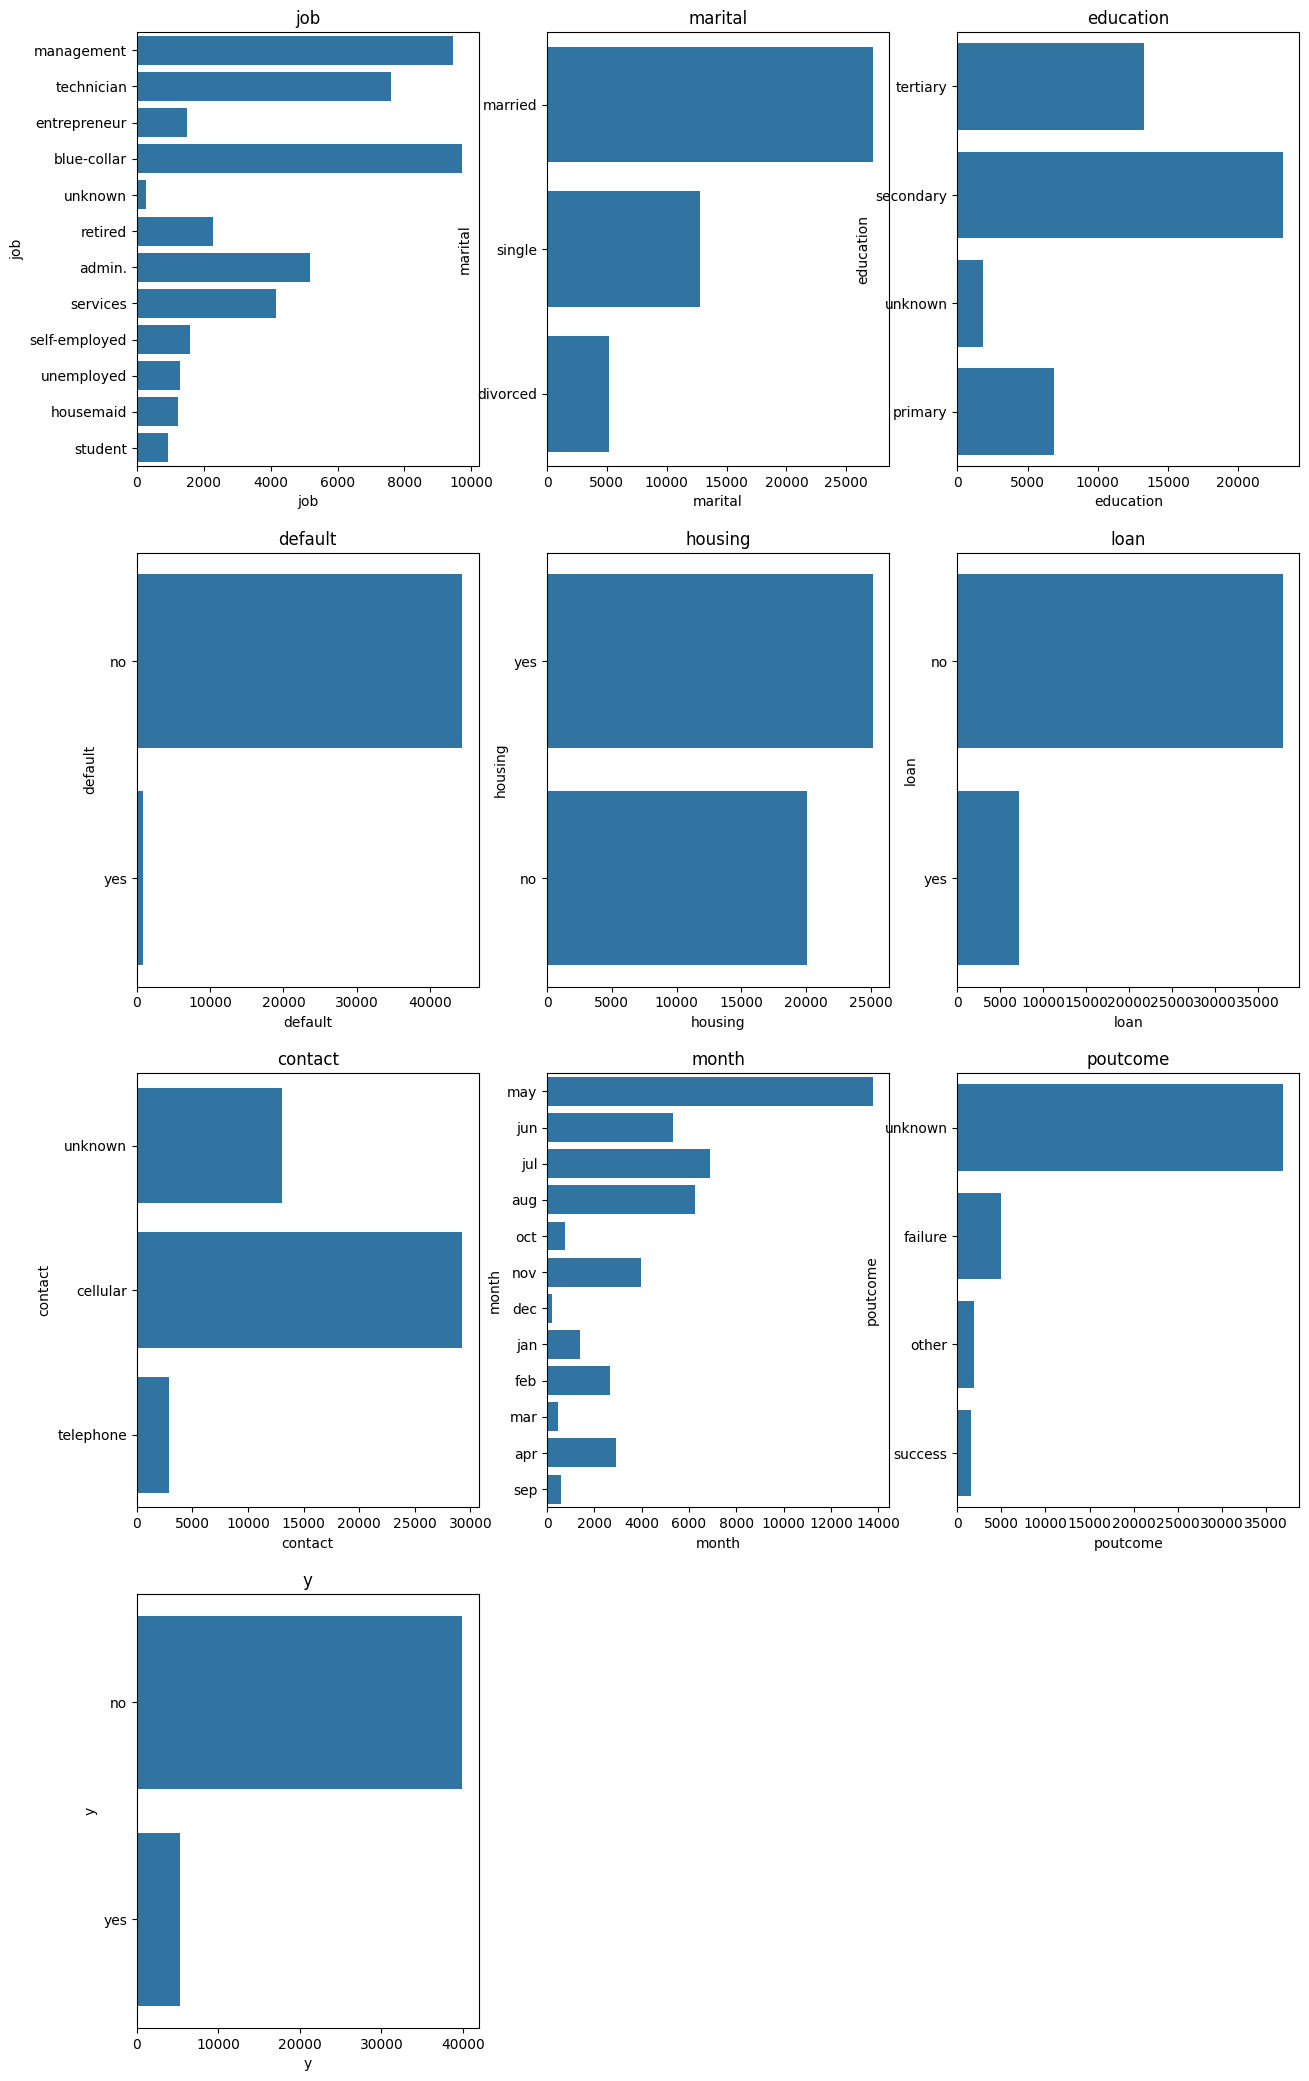

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
# Use 'categorical_cols' instead of 'categorical_features'
for categorical_feature in categorical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [ ]:
# List numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Features:", numerical_cols)

# Summary statistics
print("\nNumerical Feature Summary:")
print(df[numerical_cols].describe())



Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Numerical Feature Summary:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.00

In [ ]:
# Discrete features are integer-based
discrete_features = [col for col in numerical_cols if df[col].nunique() < 25]
print("\nDiscrete Numerical Features:", discrete_features)

# Relation with target
for col in discrete_features:
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"Relationship between {col} and {target}")
    plt.xticks(rotation=45)
    plt.show()



Discrete Numerical Features: []



Continuous Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


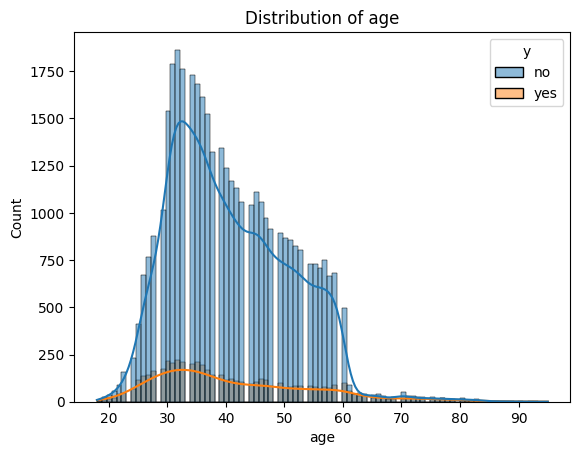

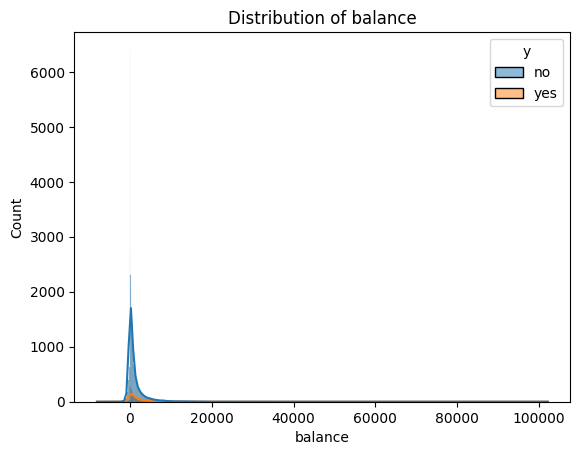

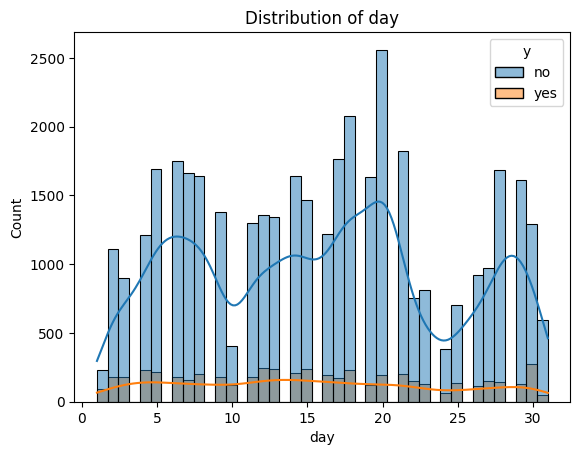

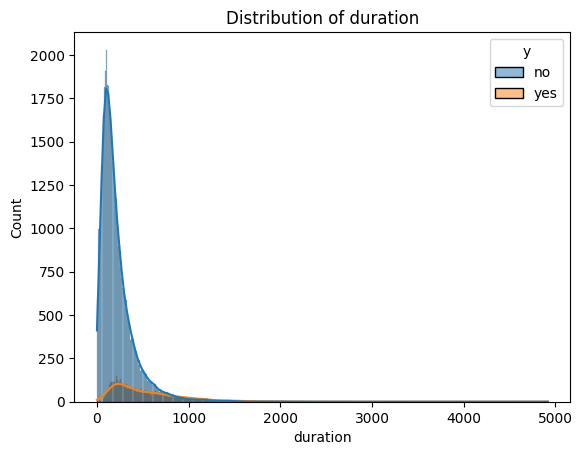

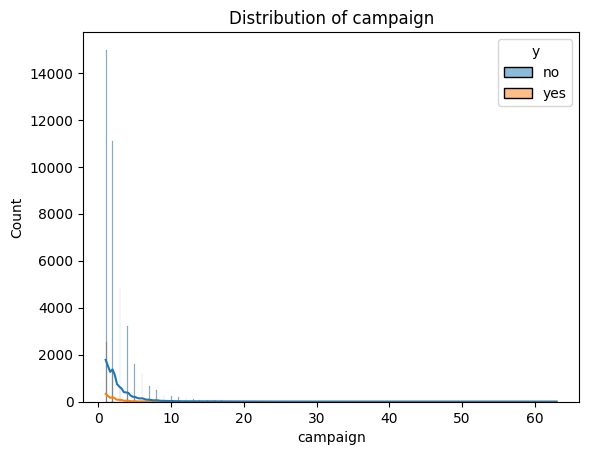

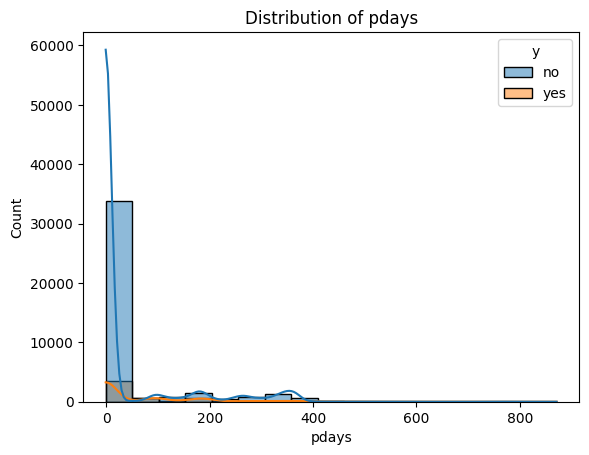

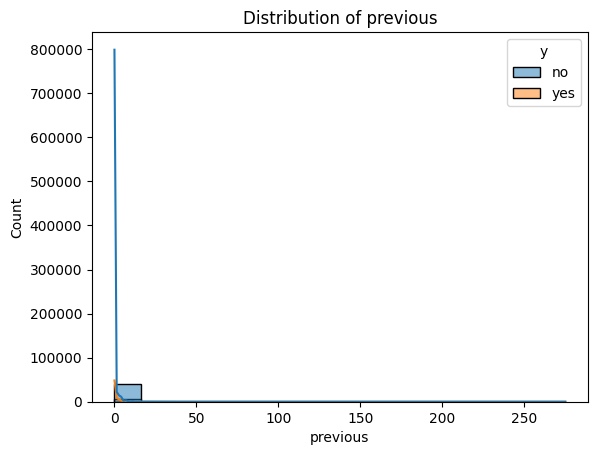

In [ ]:
# Continuous features have more unique values
continuous_features = [col for col in numerical_cols if col not in discrete_features]
print("\nContinuous Numerical Features:", continuous_features)

# Define 'target' as the name of the target column
target = 'y'  # Replace 'y' with the actual column name if different

# Distribution and relationship with target
for col in continuous_features:
    sns.histplot(data=df, x=col, kde=True, hue=target)
    plt.title(f"Distribution of {col}")
    plt.show()

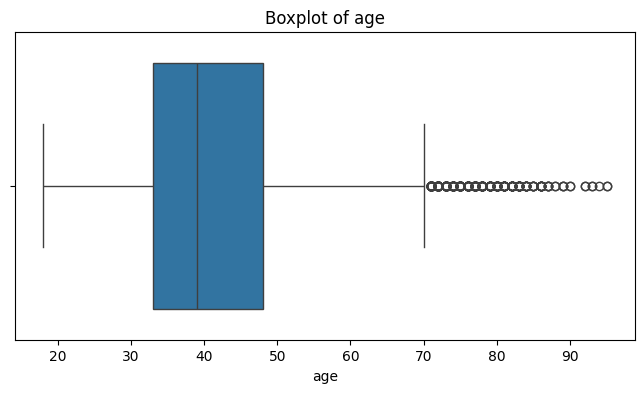

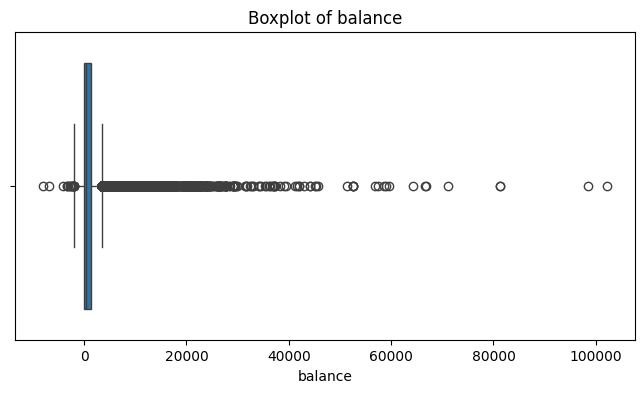

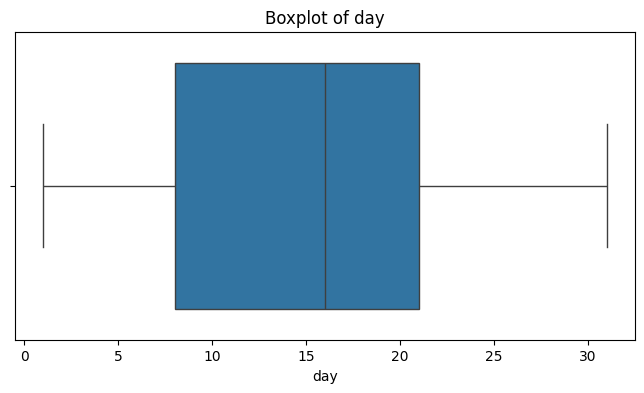

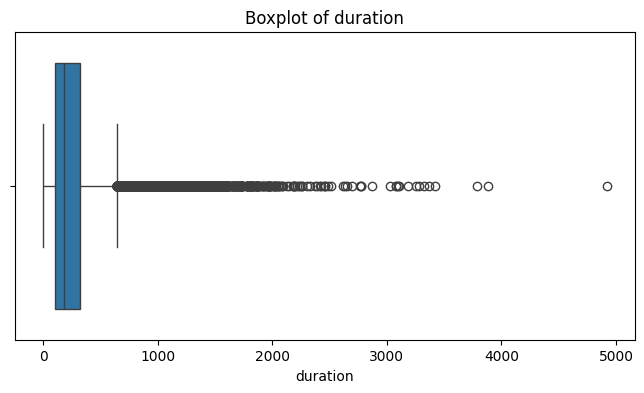

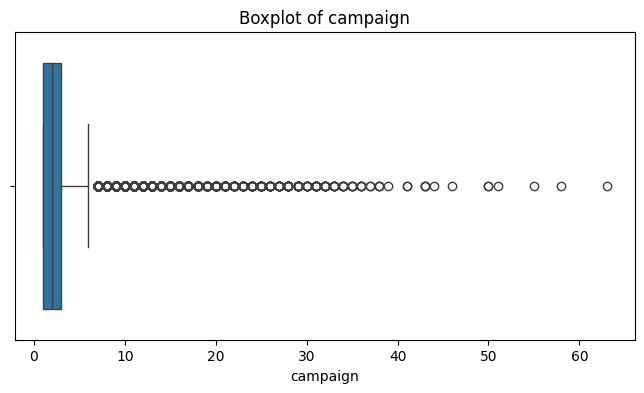

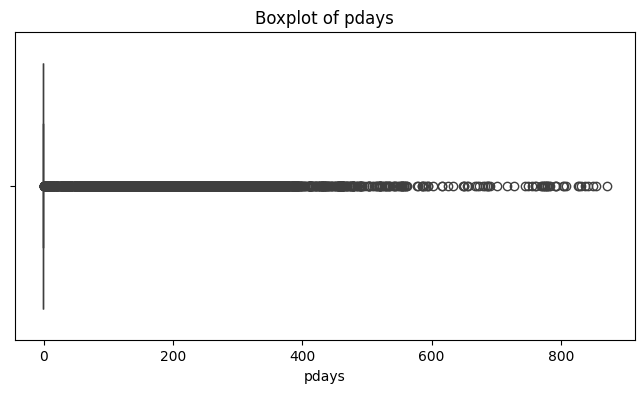

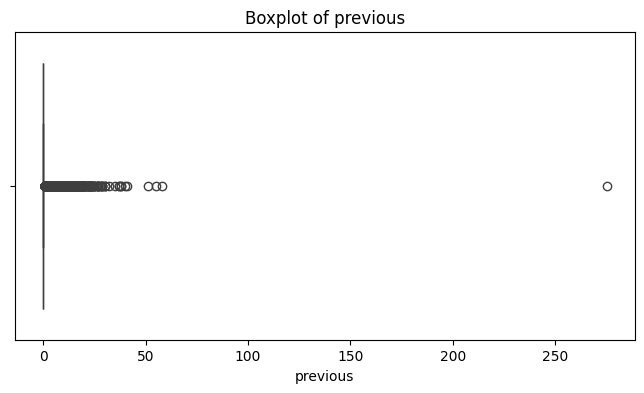

In [ ]:
# Boxplots to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


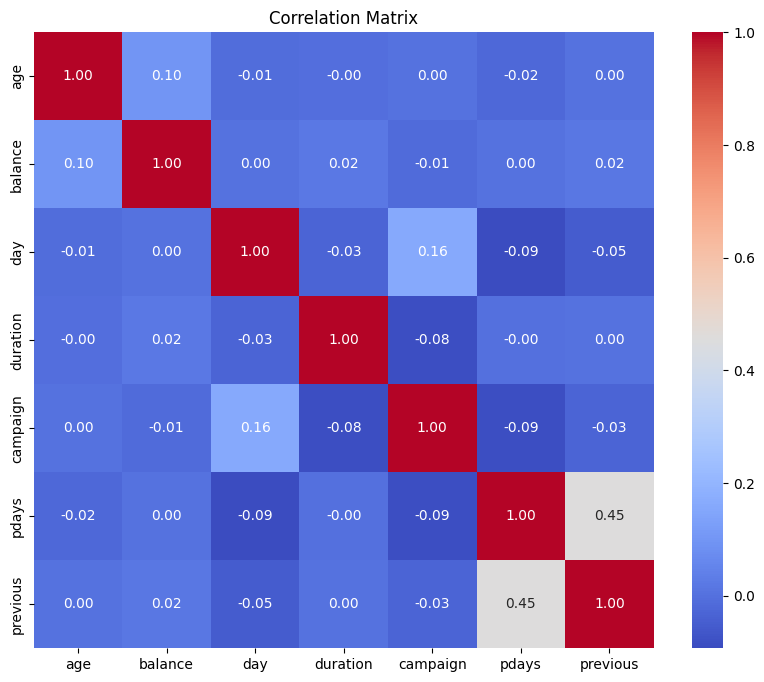

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


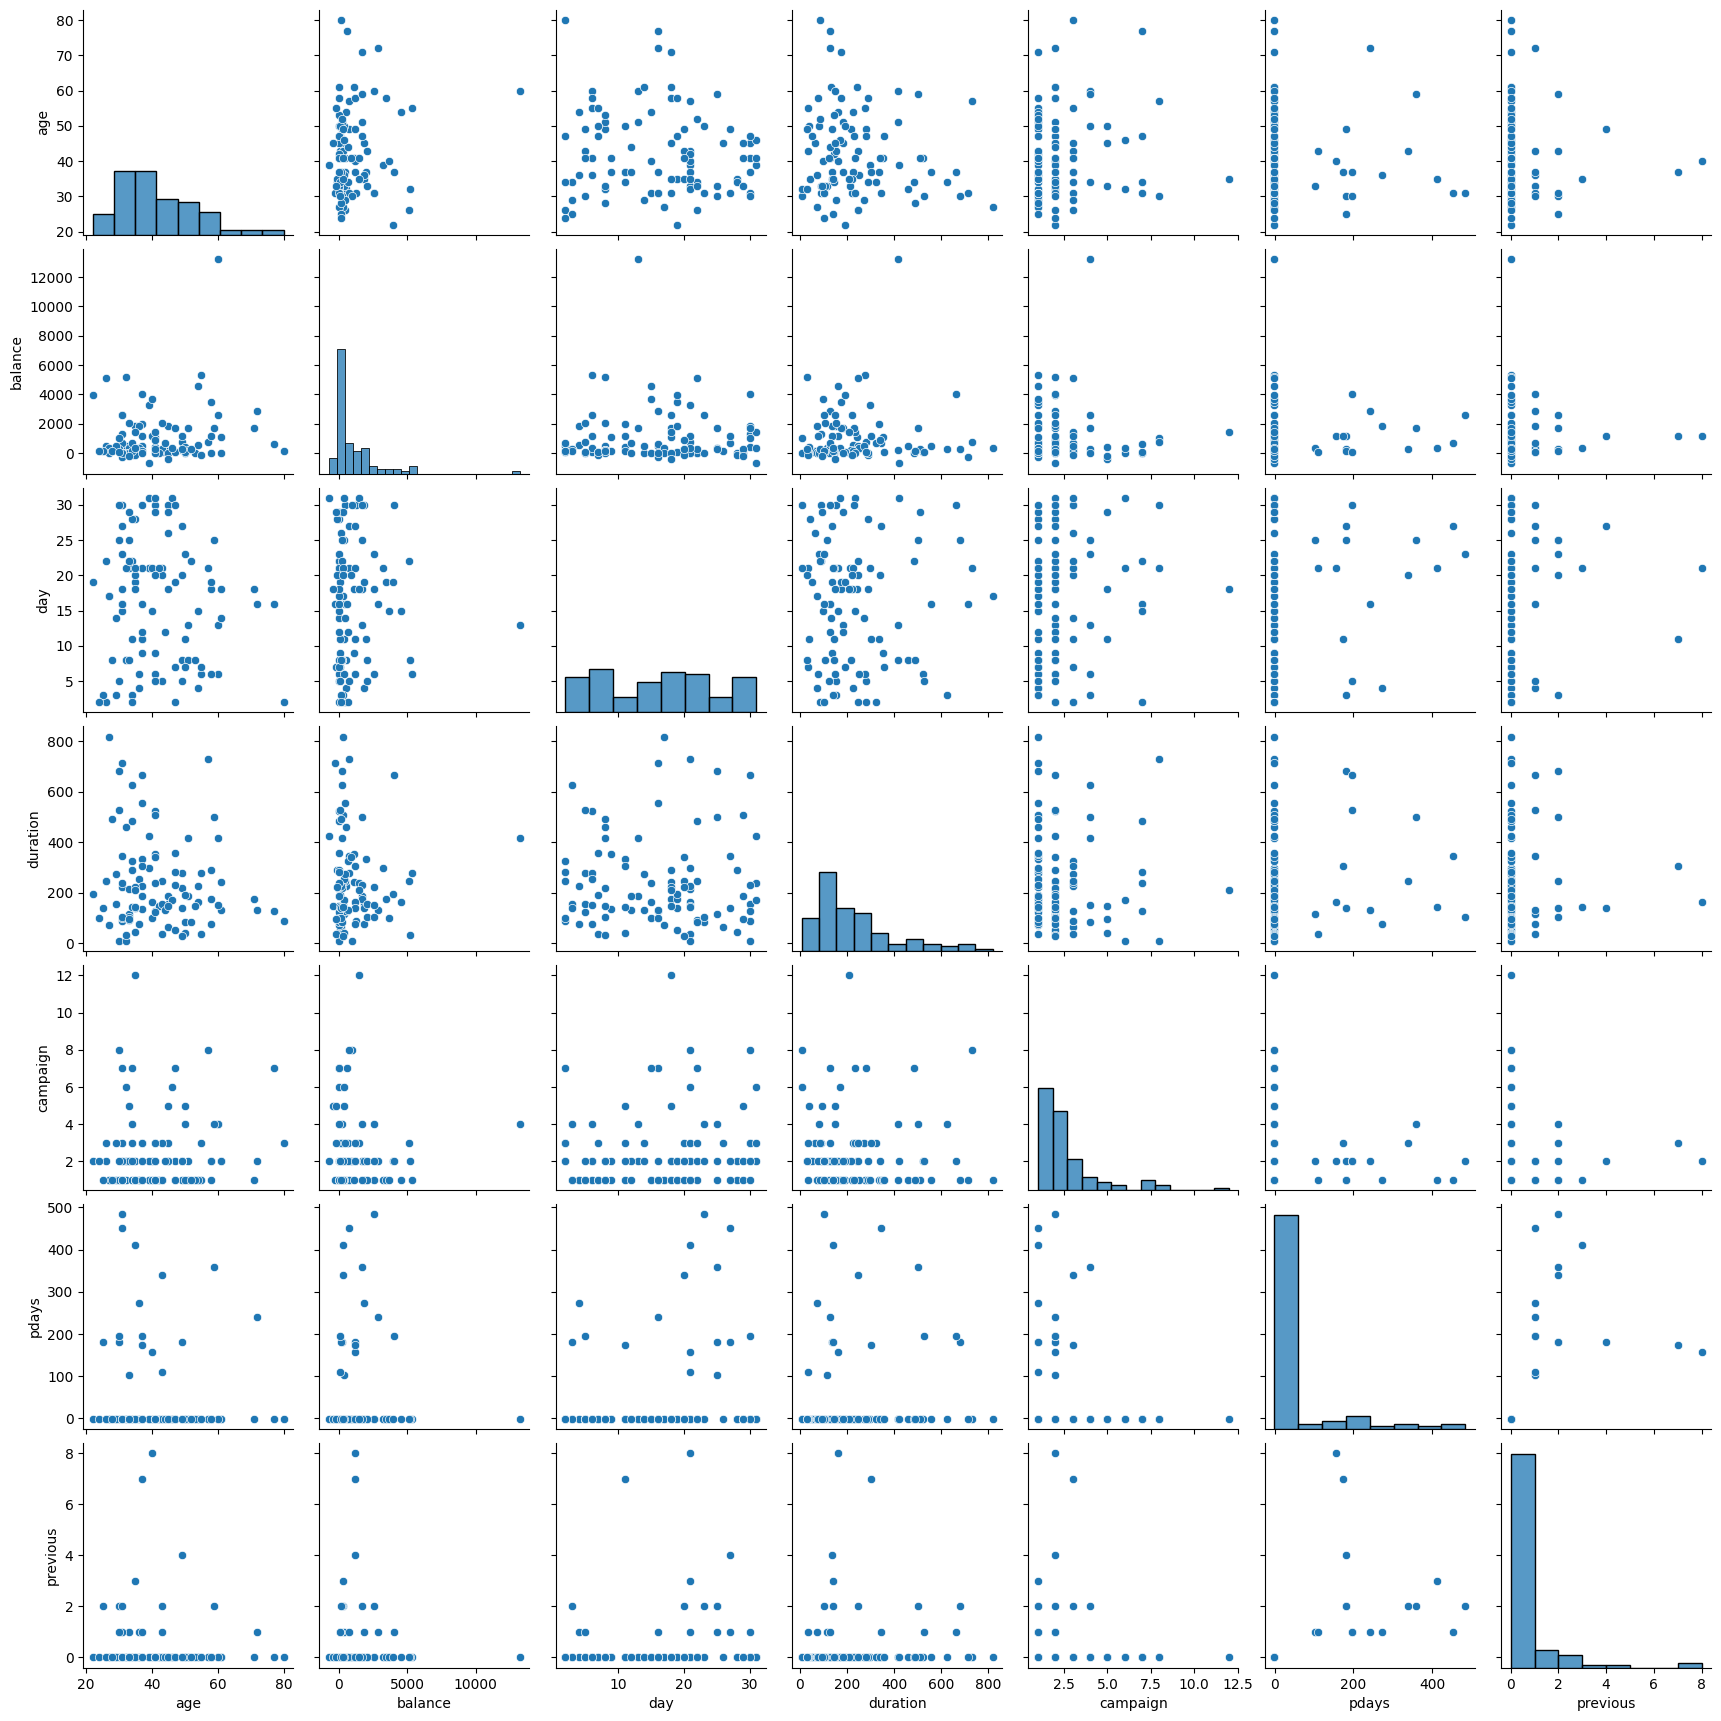

In [ ]:
# Pair plot for numerical features (sampling to avoid overload)
sns.pairplot(df[numerical_cols].sample(100))  # Adjust sample size if necessary
plt.show()



Class Distribution in Target:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


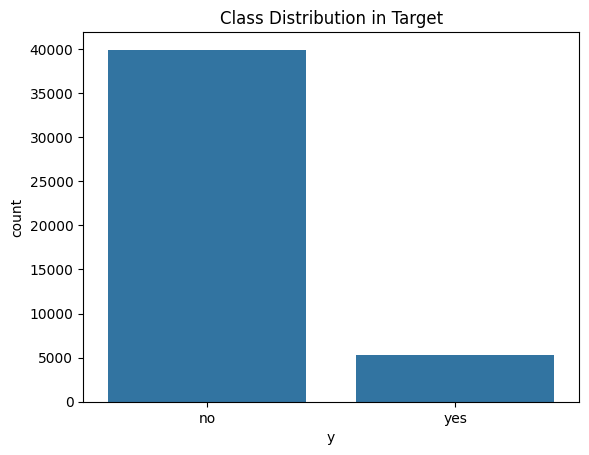

In [ ]:
# Data balance in target column
print("\nClass Distribution in Target:")
print(df[target].value_counts(normalize=True))

# Visualization
sns.countplot(data=df, x=target)
plt.title('Class Distribution in Target')
plt.show()


In [ ]:
# # Save the final cleaned dataset
# cleaned_file_path = '/content/cleaned_bank_data.csv'
# df.to_csv(cleaned_file_path, index=False)
# print("\nCleaned dataset saved at:", cleaned_file_path)


In [ ]:
# Replace 'deposit' with the actual column name if it's different
df['y'].groupby(df['y']).count()

,y
y,
no,39922
yes,5289


In [ ]:
# Preview the dataset
print("First 5 rows:")
print(df.head())

First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Make a copy to preserve the original data
df2 = df.copy()
print(df2.head())
print("\nShape of dataset:", df2.shape)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Shape of dataset: (45211, 17)


In [ ]:
# 'default' feature does not play an important role
print("\nGroup by 'default':")
print(df2.groupby(['y', 'default']).size())

df2.drop(['default'], axis=1, inplace=True)

# Drop 'pdays' as it has -1 value for around 40%+
print("\nGroup by 'pdays':")
print(df2.groupby(['y', 'pdays']).size())

df2.drop(['pdays'], axis=1, inplace=True)



Group by 'default':
y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

Group by 'pdays':
y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64


In [ ]:
# Analyze 'age'
print("\nAge Distribution:")
print(df2['age'].describe())

# Retain values between 18 and 95
df2 = df2[(df2['age'] >= 18) & (df2['age'] <= 95)]

# Analyze 'balance' (keep outliers as high balance may indicate higher deposit interest)
print("\nBalance Distribution:")
print(df2['balance'].describe())

# Analyze 'duration' (keep outliers as higher duration may show interest in deposit)
print("\nDuration Distribution:")
print(df2['duration'].describe())

# Analyze 'campaign'
print("\nCampaign Distribution:")
print(df2['campaign'].describe())

# Remove outliers in 'campaign' (keep values less than 33)
df2 = df2[df2['campaign'] < 33]

# Analyze 'previous'
print("\nPrevious Distribution:")
print(df2['previous'].describe())

# Remove outliers in 'previous' (keep values less than 31)
df2 = df2[df2['previous'] < 31]

print("\nShape after removing outliers:", df2.shape)



Age Distribution:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Balance Distribution:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Duration Distribution:
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Campaign Distribution:
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

Previous Distribution:
count    45173.000000
mean         0.580812
std         

In [ ]:
# Encode categorical features with one-hot encoding
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df3 = df2.copy()

for col in cat_columns:
    df3 = pd.concat([df3.drop(col, axis=1),
                     pd.get_dummies(df3[col], prefix=col, drop_first=True)], axis=1)

print("\nCategorical Features Encoded.")



Categorical Features Encoded.


In [ ]:
# Convert 'housing', 'loan', and 'y' (deposit) into binary features
bool_columns = ['housing', 'loan', 'y']

for col in bool_columns:
    df3[col + '_new'] = df3[col].apply(lambda x: 1 if x == 'yes' else 0)
    df3.drop(col, axis=1, inplace=True)

print("\nBoolean Features Encoded.")



Boolean Features Encoded.


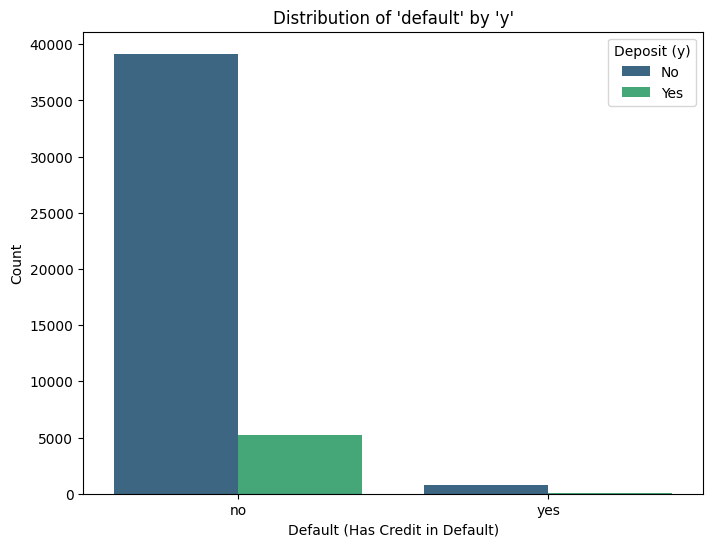

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the original DataFrame 'df' which still contains 'default'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default', hue='y', palette='viridis')  # Changed df2 to df
plt.title("Distribution of 'default' by 'y'")
plt.xlabel('Default (Has Credit in Default)')
plt.ylabel('Count')
plt.legend(title='Deposit (y)', labels=['No', 'Yes'])
plt.show()

In [ ]:

# Save cleaned dataset
cleaned_file_path = '/content/cleaned_bank_data.csv'
df3.to_csv(cleaned_file_path, index=False)

print("\nCleaned dataset saved at:", cleaned_file_path)
print(df3.head())



Cleaned dataset saved at: /content/cleaned_bank_data.csv
   age  balance  day  duration  campaign  previous  job_blue-collar  \
0   58     2143    5       261         1         0            False   
1   44       29    5       151         1         0            False   
2   33        2    5        76         1         0            False   
3   47     1506    5        92         1         0             True   
4   33        1    5       198         1         0            False   

   job_entrepreneur  job_housemaid  job_management  ...  month_may  month_nov  \
0             False          False            True  ...       True      False   
1             False          False           False  ...       True      False   
2              True          False           False  ...       True      False   
3             False          False           False  ...       True      False   
4             False          False           False  ...       True      False   

   month_oct  month_sep  pou

In [ ]:
# Load cleaned dataset
file_path = '/content/cleaned_bank_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Split features and target variable
X = df.drop(['y_new'], axis=1)  # Features
y = df['y_new']                # Target (1 = yes, 0 = no)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (36128, 40)
Testing set size: (9033, 40)



Random Forest Model Evaluation:
Accuracy: 0.9000332115576221

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7960
           1       0.64      0.37      0.47      1073

    accuracy                           0.90      9033
   macro avg       0.78      0.67      0.71      9033
weighted avg       0.89      0.90      0.89      9033



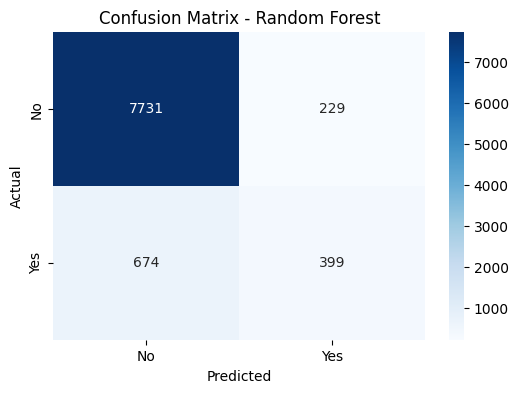

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
X = pd.get_dummies(X, drop_first=True)



Neural Network Model Evaluation:
Accuracy: 0.8807705081368317

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7960
           1       0.50      0.53      0.51      1073

    accuracy                           0.88      9033
   macro avg       0.72      0.73      0.72      9033
weighted avg       0.88      0.88      0.88      9033



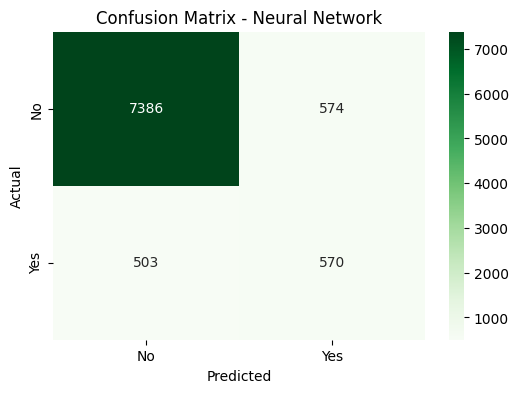

In [ ]:
# Train Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
mlp_pred = mlp_model.predict(X_test)

# Model Evaluation
print("\nNeural Network Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


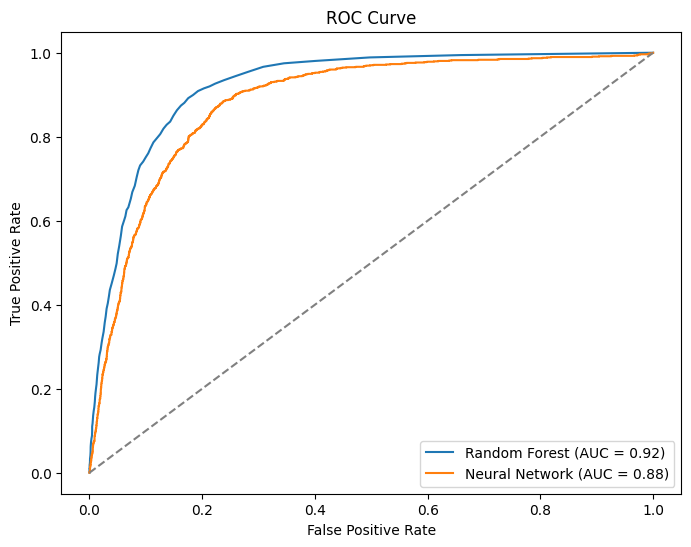

In [ ]:
# ROC Curve for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# ROC Curve for Neural Network
mlp_probs = mlp_model.predict_proba(X_test)[:, 1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'Neural Network (AUC = {mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.90


In [ ]:
# Neural Network Accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"Neural Network Accuracy: {mlp_accuracy:.2f}")


Neural Network Accuracy: 0.88


In [ ]:
from sklearn.utils import resample

# Combine X_train and y_train into one dataset
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
# Use 'y_new' instead of 'y' to access the target column
class_0 = train_data[train_data['y_new'] == 0]  # Clients who did not subscribe
class_1 = train_data[train_data['y_new'] == 1]  # Clients who subscribed

# Oversample the minority class
class_1_oversampled = resample(class_1,
                               replace=True,   # Sample with replacement
                               n_samples=len(class_0),  # Match majority class
                               random_state=42)

# Combine both classes
balanced_train = pd.concat([class_0, class_1_oversampled])

# Split features and labels again
# Use 'y_new' instead of 'y' when dropping the target column
X_train_balanced = balanced_train.drop('y_new', axis=1)
y_train_balanced = balanced_train['y_new']

print("Balanced class distribution:\n", y_train_balanced.value_counts())

Balanced class distribution:
 y_new
0    31914
1    31914
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 150],          # Number of trees
    'max_depth': [10, 20, 30, None],         # Depth of trees
    'min_samples_split': [2, 5, 10],         # Min samples required to split
    'min_samples_leaf': [1, 2, 4],           # Min samples per leaf
    'bootstrap': [True, False]               # Bootstrap sampling
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Random Search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,      # Number of combinations to try
                                   cv=3,           # 3-fold cross-validation
                                   verbose=1,
                                   n_jobs=-1,      # Use all processors
                                   random_state=42)

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train the final model with best parameters
rf_best = random_search.best_estimator_

# Predict on test set
y_pred = rf_best.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Accuracy: 0.8985940440606665

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7960
           1       0.58      0.54      0.56      1073

    accuracy                           0.90      9033
   macro avg       0.76      0.75      0.75      9033
weighted avg       0.90      0.90      0.90      9033



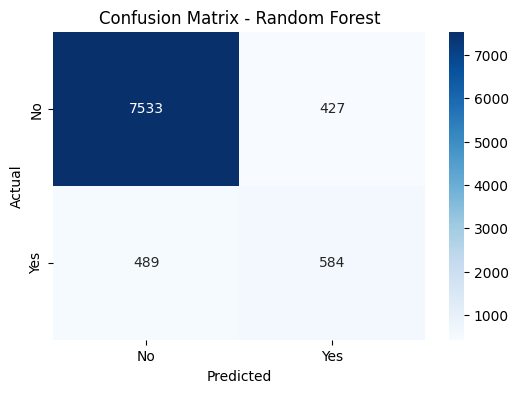

In [ ]:

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

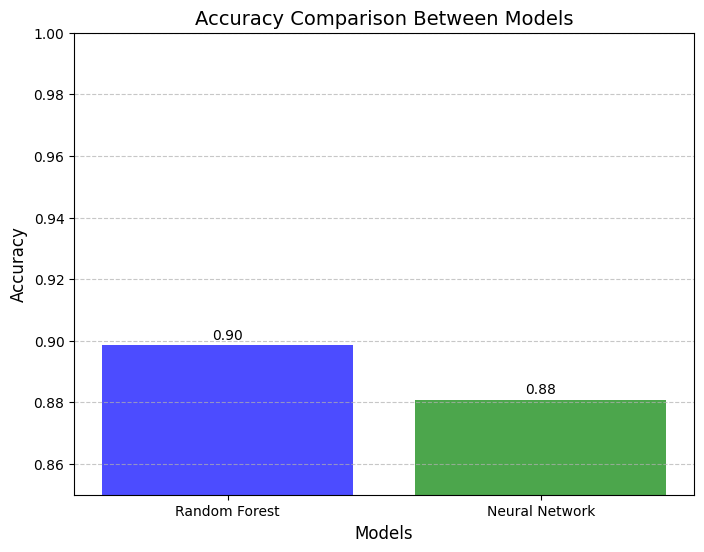

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
models = ['Random Forest', 'Neural Network']
accuracies = [0.8985940440606665, 0.8807705081368317]  # Replace with your actual accuracies

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'], alpha=0.7)
plt.ylim(0.85, 1)  # Set limits to focus on the accuracy range
plt.title('Accuracy Comparison Between Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)

# Adding accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f'{acc:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
